# Setup

## Colab

In [1]:
# Mount the drive and move to dir
from google.colab import drive
drive.mount("/content/drive", force_remount = False)
%cd /content/drive/MyDrive/Coding/spread-res/runscr/

Mounted at /content/drive
/content/drive/MyDrive/Coding/spread-res/runscr


## Imports

In [2]:
# Import importlib to reload modules and sys and os to add the path for other import
import importlib
import os
import sys

import torch

# Append the parent directory to the path to import the necessary modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Import the model architecture
from classes.models import BertGrid

# Import the utilities and the dataloader
from utils import inferutil, setuputil, trainutil

# Now reload the modules to ensure they are up-to-date
importlib.reload(setuputil)
importlib.reload(trainutil)
importlib.reload(inferutil)
importlib.reload(BertGrid)

# Import the model and funcs required from utils
from classes.models.BertGrid import BertGrid
from utils.inferutil import infer_full, infer_one
from utils.setuputil import display_config, setup_config
from utils.trainutil import train_model

## Configuration

device = cuda/mps:0 (env-specific), threads = 1 to inf (env-specific), seed = 0 to inf, data_dir = ../data, rows = 100, cols = 100, tokens = 32, save_dir = ../models/

In [3]:
# Setup the config
input_config = {
    # Environment and Model Info
    "env": "colab",
    "approach": "bert",
    "model_name": "BertGrid",
    "model_base": "bert-base-cased",
    "data_ds": "1k",
    # BERT Architecture Parameters
    "vocab_size": 30522,
    "hidden_size": 32,
    "num_hidden_layers": 1,
    "num_attention_heads": 1,
    "intermediate_size": 128,
    # Training Parameters
    "batch_size": 12,
    "lr": 1e-3,
    "mu": 0.25,
    "epochs": 200,
    "patience": 2,
    "save_int": 50,
}
config = setup_config(input_config)
display_config(config)

# Define local variables from the config dictionary
DEVICE = config["DEVICE"]
THREADS = config["THREADS"]

# Data loaders and vocab
train_loader = config["train_loader"]
val_loader = config["val_loader"]
test_loader = config["test_loader"]
tokenizer = config["tokenizer"]
model_base = config["model_base"]

# Training parameters
batch_size = config["batch_size"]
lr = config["lr"]
mu = config["mu"]
epochs = config["epochs"]
patience = config["patience"]
save_int = config["save_int"]
save_dir = config["save_dir"]
save_name = config["save_name"]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Processing files: 100%|██████████| 800/800 [02:39<00:00,  5.03it/s]



800(P) = 800(G) + 0(E)


Processing files: 100%|██████████| 100/100 [00:15<00:00,  6.61it/s]



100(P) = 100(G) + 0(E)


Processing files: 100%|██████████| 100/100 [00:17<00:00,  5.71it/s]



100(P) = 100(G) + 0(E)

FINAL CONFIG:
{
  "env": "colab",
  "approach": "bert",
  "DEVICE": "<device>",
  "THREADS": 10,
  "seed": 0,
  "model_base": "bert-base-cased",
  "model_name": "BertGrid",
  "rows": 100,
  "cols": 100,
  "tokens": 32,
  "data_ds": "1k",
  "data_dir": "../data",
  "train_dir": "../data/1k_train",
  "val_dir": "../data/1k_val",
  "test_dir": "../data/1k_test",
  "tokenizer": "<BertTokenizerFast>",
  "vocab_size": 30522,
  "hidden_size": 32,
  "num_hidden_layers": 1,
  "num_attention_heads": 1,
  "intermediate_size": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "attention_probs_dropout_prob": 0.1,
  "max_position_embeddings": 64,
  "type_vocab_size": 2,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-12,
  "pad_token_id": 0,
  "gradient_checkpointing": false,
  "train_loader": "<LoaderBert>",
  "val_loader": "<LoaderBert>",
  "test_loader": "<LoaderBert>",
  "batch_size": 12,
  "lr": 0.001,
  "mu": 0.25,
  "epochs": 200,
  "patience": 2,
  "sa

# Model Training

In [4]:
# Create and observe the model
untrained_model = BertGrid(config).to(DEVICE)
print(untrained_model)

BertGrid(
  (bertModel_cell): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 32, padding_idx=0)
      (position_embeddings): Embedding(64, 32)
      (token_type_embeddings): Embedding(2, 32)
      (LayerNorm): LayerNorm((32,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=32, out_features=32, bias=True)
              (key): Linear(in_features=32, out_features=32, bias=True)
              (value): Linear(in_features=32, out_features=32, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=32, out_features=32, bias=True)
              (LayerNorm): LayerNorm((32,), eps=1e-12, elementwise_affine=True)
   

## Training Metrics

1. GPU Model: 521 mb
2. GPU Training: 31.2 gb

3. Per Epoch Train Time: 33s
4. Per Epoch Val Time: 1s


In [5]:
# Train with adjusted batch size
trained_model = train_model(
    untrained_model,
    train_loader,
    val_loader,
    DEVICE,
    batch_size=batch_size,
    lr=lr,
    mu=mu,
    max_epochs=epochs,
    patience=patience,
    save_int=save_int,
    save_dir=save_dir,
    save_name=save_name,
    config=config,
)

Epoch 0


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.52it/s]


Train Loss: 1.2041e+00, Val Loss: 9.7983e-01


Epoch 1


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.53it/s]


Train Loss: 8.7155e-01, Val Loss: 6.4566e-01


Epoch 2


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.53it/s]


Train Loss: 6.2562e-01, Val Loss: 5.1892e-01


Epoch 3


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.52it/s]


Train Loss: 5.1859e-01, Val Loss: 4.7105e-01


Epoch 4


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.45it/s]


Train Loss: 4.6529e-01, Val Loss: 4.4404e-01


Epoch 5


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.53it/s]


Train Loss: 4.4091e-01, Val Loss: 4.2656e-01


Epoch 6


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.54it/s]


Train Loss: 4.2196e-01, Val Loss: 4.0997e-01


Epoch 7


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.53it/s]


Train Loss: 4.1046e-01, Val Loss: 3.9799e-01


Epoch 8


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.52it/s]


Train Loss: 3.9582e-01, Val Loss: 3.8721e-01


Epoch 9


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.52it/s]


Train Loss: 3.8657e-01, Val Loss: 3.7725e-01


Epoch 10


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.53it/s]


Train Loss: 3.8298e-01, Val Loss: 3.6727e-01


Epoch 11


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.53it/s]


Train Loss: 3.8473e-01, Val Loss: 3.6559e-01


Epoch 12


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.53it/s]


Train Loss: 3.7801e-01, Val Loss: 3.6238e-01


Epoch 13


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.53it/s]


Train Loss: 3.7931e-01, Val Loss: 3.5197e-01


Epoch 14


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.53it/s]


Train Loss: 3.8911e-01, Val Loss: 3.4403e-01


Epoch 15


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.53it/s]


Train Loss: 3.7480e-01, Val Loss: 3.3495e-01


Epoch 16


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.53it/s]


Train Loss: 3.9595e-01, Val Loss: 3.2696e-01


Epoch 17


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.53it/s]


Train Loss: 3.8480e-01, Val Loss: 3.2173e-01


Epoch 18


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.53it/s]


Train Loss: 4.1176e-01, Val Loss: 3.2795e-01


Epoch 19


Validation Processing: 100%|██████████| 9/9 [00:01<00:00,  5.53it/s]

Train Loss: 3.9143e-01, Val Loss: 3.2307e-01


EARLY STOPPING at epoch 19, best epoch 17
Train Loss = 3.8480e-01, Val Loss = 3.2173e-01


TRAINING DONE at epoch 19, best epoch 17
Train Loss = 0.3847987529501986, Perplexity = 1.000003206661416
Val Loss = 0.32173126770390403, Perplexity = 1.0000026810974916


# Evaluation

In [23]:
# Params
loc = 0
thresh = 0.92
infer_batch_size = batch_size

## Single Example


Filename: ../data/1k_train/2006fair.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(39,0): 0.908495 | (28,0): 0.908655 | (63,0): 0.908889 | (45,0): 0.912255 | (23,0): 0.918151 | (0,0): 0.919632 | (16,0): 0.920913 | (6,0): 0.921742

NB to B ratio: Predicted = 9989:11 | Actual = 9992:8
Accuracy: 99.85% | Precision: 18.18% | Recall: 25.00% | F1-Score: 0.21



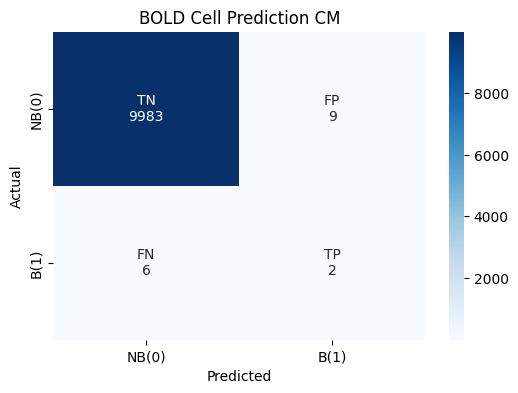


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0
2,1
3,1
4,1
6,1
8,1
9,1
11,1
12,1
13,1
14,1



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0
0,1
6,1
16,1
23,1
28,1
39,1
45,1
63,1


In [24]:
# Inference on single position of train_loader
infer_one(
    trained_model=trained_model,
    infer_loader=train_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)


Filename: ../data/1k_val/1-s2.0-S0041008X19303655-mmc4.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
No bold cells in the actual data.

NB to B ratio: Predicted = 9924:76 | Actual = 10000:0
Accuracy: 99.24% | Precision: 0.00% | Recall: 0.00% | F1-Score: 0.00



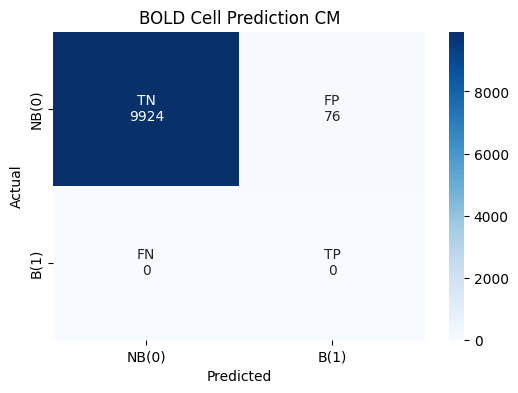


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,3,4,5,6,7,8,9,10,11,12
0,0,0,0,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,0,0,1,1,0,0,1
2,1,1,1,0,1,0,0,1,1,0,0,1
3,1,1,1,0,1,0,0,1,1,1,0,1
4,1,1,1,0,0,0,0,1,0,0,0,0
5,1,1,1,0,0,0,0,0,0,0,0,0
6,1,1,1,0,0,0,0,0,0,0,0,0
7,1,1,1,0,0,0,0,0,0,0,0,0
8,1,1,1,0,0,0,0,0,0,0,0,0
9,1,1,1,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---
No bold cells in actual data.


In [25]:
# Inference on single position of val_loader
infer_one(
    trained_model=trained_model,
    infer_loader=val_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)


Filename: ../data/1k_test/1415-bassessment-1.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
(8,6): 0.915375 | (8,5): 0.917710 | (8,4): 0.919254 | (8,3): 0.919884 | (8,0): 0.920252 | (8,2): 0.920739 | (8,1): 0.921111 | (6,0): 0.921577

NB to B ratio: Predicted = 9969:31 | Actual = 9992:8
Accuracy: 99.69% | Precision: 12.90% | Recall: 50.00% | F1-Score: 0.21



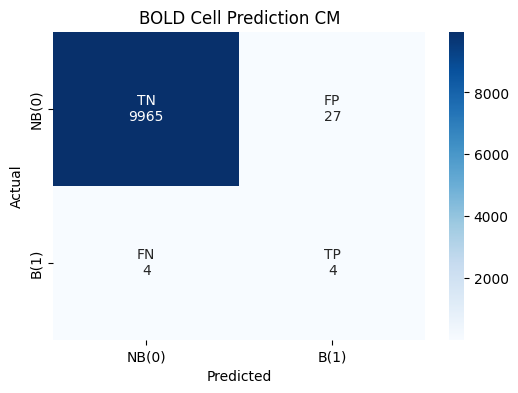


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3
0,0,1,0,0
1,1,1,0,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
6,1,0,0,0
8,1,1,1,0
9,0,1,1,0
10,0,1,1,0
11,0,1,1,1



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6
6,1,0,0,0,0,0,0
8,1,1,1,1,1,1,1


In [26]:
# Inference on single position of test_loader
infer_one(
    trained_model=trained_model,
    infer_loader=test_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)

## All Examples

Batch Inference: 100%|██████████| 67/67 [00:17<00:00,  3.79it/s]



--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 7970640:29360 | Actual = 7975154:24846
Accuracy: 99.50% | Precision: 22.77% | Recall: 42.21% | F1-Score: 0.25



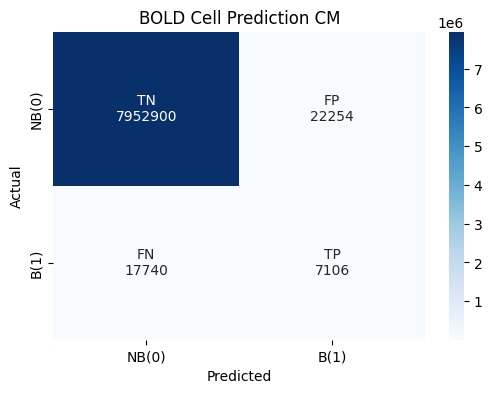

In [27]:
# Infer across all examples of train_loader
infer_full(
    trained_model=trained_model,
    infer_loader=train_loader,
    batch_size=infer_batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)

Batch Inference: 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]



--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 996261:3739 | Actual = 997147:2853
Accuracy: 99.50% | Precision: 25.81% | Recall: 35.68% | F1-Score: 0.26



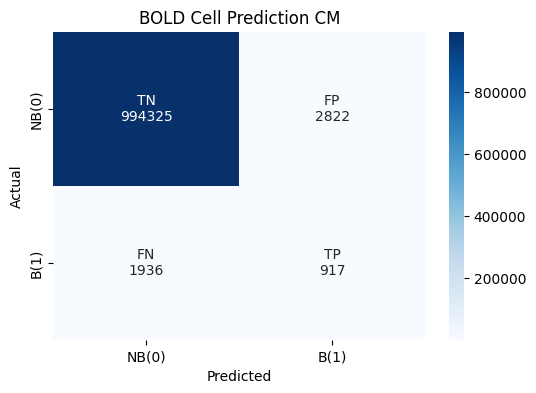

In [28]:
# Infer across all examples of val_loader
infer_full(
    trained_model=trained_model,
    infer_loader=val_loader,
    batch_size=infer_batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)

Batch Inference: 100%|██████████| 9/9 [00:02<00:00,  4.05it/s]



--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 996202:3798 | Actual = 997320:2680
Accuracy: 99.52% | Precision: 24.41% | Recall: 38.65% | F1-Score: 0.28



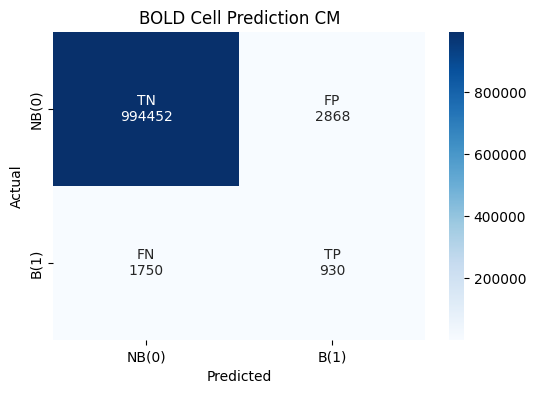

In [29]:
# Infer across all examples of test_loader
infer_full(
    trained_model=trained_model,
    infer_loader=test_loader,
    batch_size=infer_batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)